In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.svm import SVR
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 30,20

In [57]:
df = pd.read_csv('sensex.csv', parse_dates = ['Date'], index_col = 'Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-20,27232.689453,27264.410156,27009.810547,27034.500000,27034.500000,8800.0
2017-01-23,26990.929688,27167.789063,26963.580078,27117.339844,27117.339844,6600.0
2017-01-24,27170.880859,27393.349609,27140.849609,27375.580078,27375.580078,6800.0
2017-01-25,27462.830078,27736.830078,27439.679688,27708.140625,27708.140625,12200.0
2017-01-27,27761.029297,27980.390625,27759.480469,27882.460938,27882.460938,14300.0


In [58]:
data = df.drop(['High', 'Open'], axis = 1)

In [59]:
df = data.drop(['Low', 'Volume'], axis = 1)

In [60]:
df = df.drop(['Adj Close'], axis = 1)

In [61]:
df = df['2017-01-25' : ]
df[df==np.inf]=np.nan
#df.fillna(df.mean(), inplace=True)
df.dropna()

,Close
Date,
2017-01-25,27708.140625
2017-01-27,27882.460938
2017-01-30,27849.560547
2017-01-31,27655.960938
2017-02-01,28141.640625
2017-02-02,28226.609375
2017-02-03,28240.519531
2017-02-06,28439.279297
2017-02-07,28335.160156


In [62]:
df = df.dropna()
df.asfreq('D', method="pad")

,Close
Date,
2017-01-25,27708.140625
2017-01-26,27708.140625
2017-01-27,27882.460938
2017-01-28,27882.460938
2017-01-29,27882.460938
2017-01-30,27849.560547
2017-01-31,27655.960938
2017-02-01,28141.640625
2017-02-02,28226.609375


In [63]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.values)

In [65]:
X = scaled_data
Y = scaled_data

In [66]:
X[:10]

array([[0.00464205],
       [0.02015005],
       [0.01722314],
       [0.        ],
       [0.04320737],
       [0.05076642],
       [0.0520039 ],
       [0.0696861 ],
       [0.06042339],
       [0.05639869]])

In [67]:
import statsmodels.api as sm

In [68]:
dta = sm.datasets.macrodata.load_pandas().data

In [69]:
cycle, trend = sm.tsa.filters.hpfilter(X, 1600)

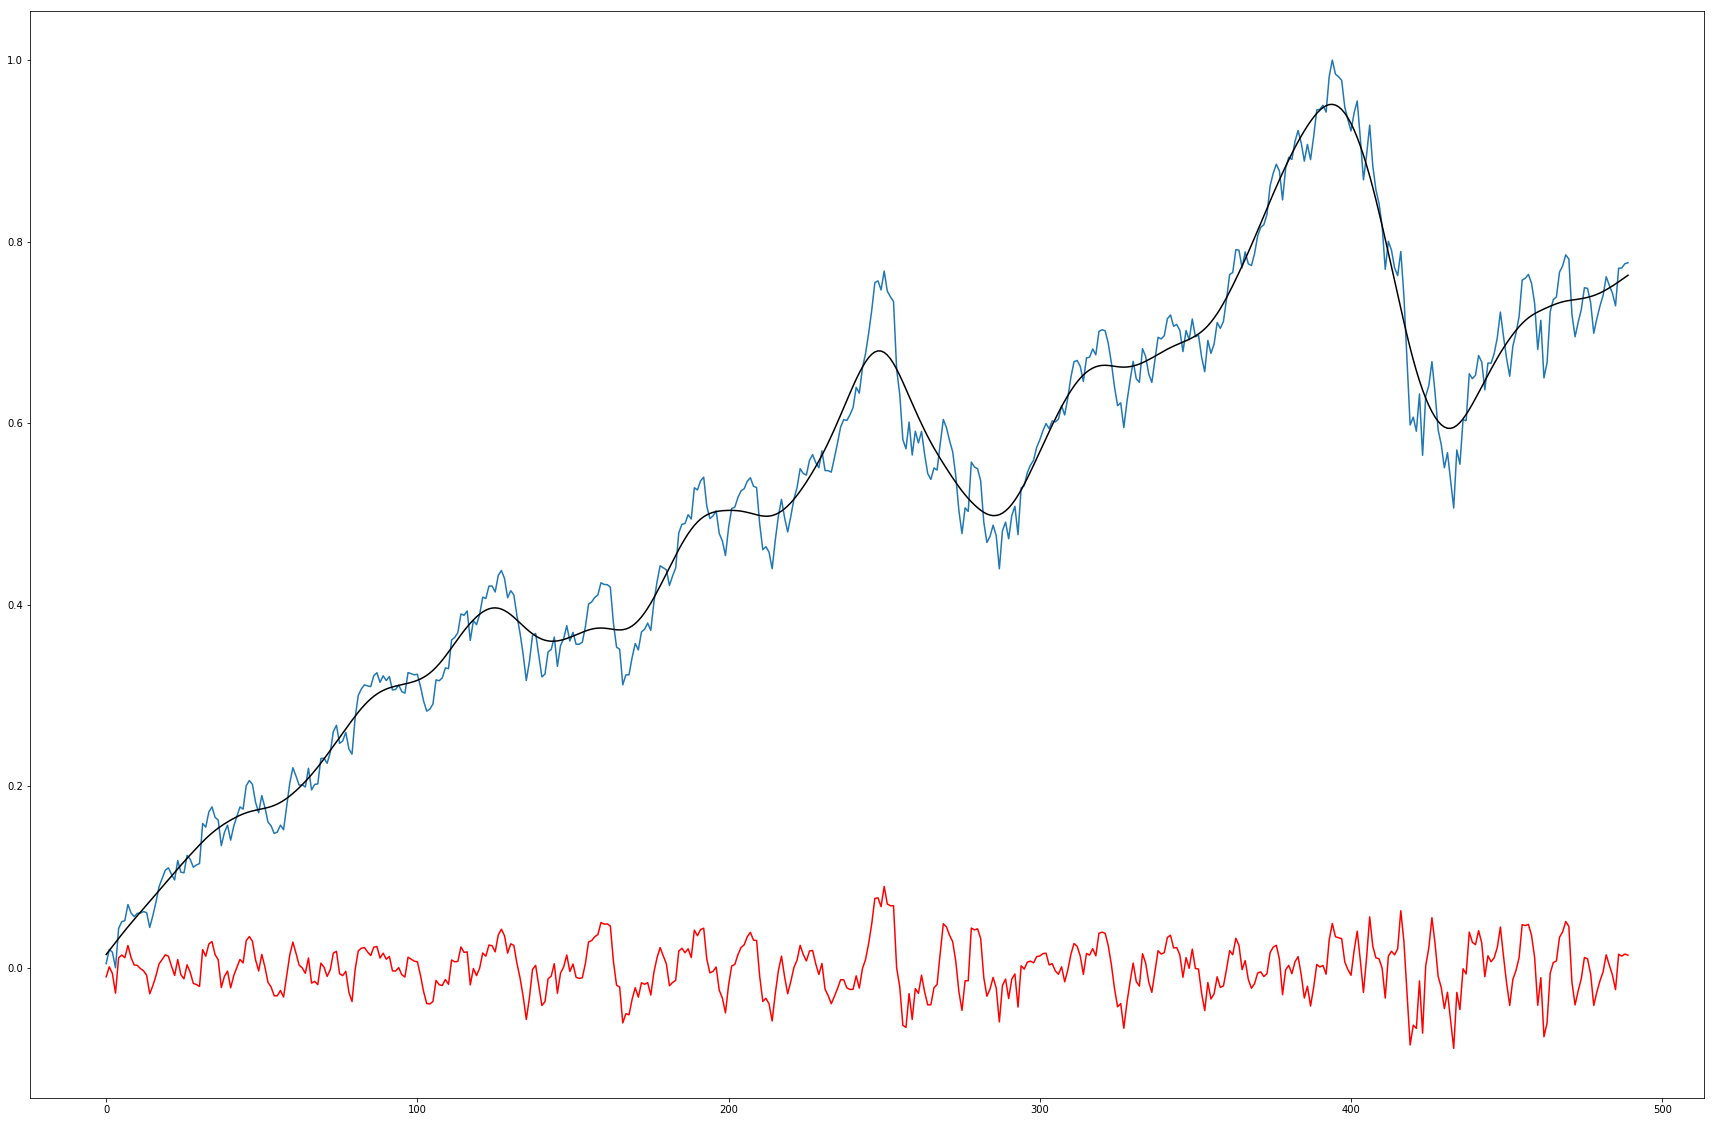

In [71]:
plt.plot(X)
plt.plot(cycle, color = 'red')
plt.plot(trend, color='black')

In [25]:
train = cycle[:480]
test = cycle[480 : ]
predictions = []

In [26]:
from statsmodels.tsa.arima_model import ARIMA

In [27]:
model_arima = ARIMA(train,order=(4,0,3))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

-2509.758975347209


/home/umang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [28]:
predictions= model_arima_fit.forecast(steps=10)[0]
predictions

array([-0.02125522, -0.00885037, -0.00664942, -0.00026741,  0.00602038,
        0.00432006,  0.00980102,  0.00924118,  0.00714391,  0.01040328])

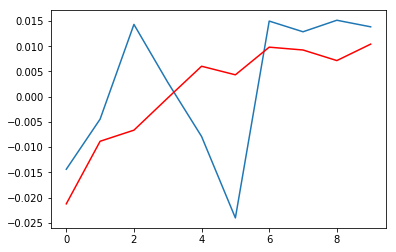

In [29]:
plt.plot(test)
plt.plot(predictions,color='red')

In [46]:
temp = trend[480:] + predictions
temp.shape

(10,)

In [54]:
temp2 = Y[480:].reshape(10, )

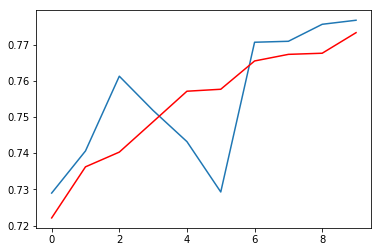

In [48]:
plt.plot(Y[480:])
plt.plot(temp, color='red')

In [49]:
from sklearn.metrics import mean_squared_error

In [50]:
mean_squared_error(Y[480:], temp)

0.00016289446010773247

In [51]:
from scipy.stats.stats import pearsonr

In [55]:
pearsonr(temp2, temp)

(0.7157312020756269, 0.019930896181984802)

In [77]:
rms = np.sqrt(np.mean(np.power(temp2-temp,2)))
rms

0.012763011404356437